In [54]:
import matplotlib.pyplot as plt
import glob

In [55]:
%matplotlib inline

In [56]:
cache_glob = glob.glob(
    "/home/xyhang/projects/VCIP2023-grand-challenge/cache/PSNR/*/*/*/b_e.npz"
)
import random
random.shuffle(cache_glob)
cache_glob = cache_glob[:1000]

print(len(cache_glob))

1000


In [57]:
import site
site.addsitedir("/home/xyhang/projects/VCIP2023-grand-challenge/")

from src.math_utils import FitKExp

In [58]:
import tqdm
import numpy as np

R2_results = [[], [], [], [], []]
maxerror_results = [[], [], [], [], []]

for filename in tqdm.tqdm(cache_glob):
    curve = FitKExp.load(filename)
    X = curve.X
    Y = curve.Y
    fitters = list([FitKExp(X=X, Y=Y, K=i, retry=False) for i in range(1, 6)])
    for i, fitter in enumerate(fitters):
        R2_results[i].append(fitter.R2(fitter.curve))
        maxerror_results[i].append(fitter.maxerror(fitter.curve))

  0%|          | 0/1000 [00:00<?, ?it/s]/home/xyhang/anaconda3/envs/SARDCO/lib/python3.9/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
100%|██████████| 1000/1000 [12:28<00:00,  1.34it/s]


In [59]:
R2_results = np.asarray(R2_results)
maxerror_results = np.asarray(maxerror_results)

In [60]:
maxerror_results[4]

array([8.12307402e+01, 7.60615790e+00, 4.73510780e+00, 3.74183409e+00,
       2.14393873e+00, 4.01430410e+00, 3.95688463e+00, 1.65085358e+00,
       2.41171767e+00, 4.46858632e+00, 1.32066329e+00, 1.12064718e+00,
       4.38248690e+00, 4.39790323e+01, 2.58551665e+00, 5.27375681e-01,
       3.25955024e+00, 3.25955487e+00, 6.48328690e-01, 2.09304787e+00,
       6.60000846e+01, 1.01497294e+02, 4.62258852e+01, 3.91317375e+00,
       1.44454539e+01, 4.97419777e+01, 5.70737975e+00, 3.76062510e+00,
       6.86772951e-01, 4.56863380e+00, 6.64984099e+01, 1.70135239e+00,
       4.90119247e+00, 2.33696118e+01, 5.04947194e+00, 3.93654382e+01,
       1.00952737e+00, 4.41793041e+00, 1.79191504e+01, 5.37669467e+01,
       1.86079560e+00, 2.14524780e+01, 4.47250788e+00, 1.20482076e+00,
       2.68257349e+00, 1.31059625e+01, 2.32050719e+00, 1.91834552e+00,
       2.46276352e+00, 2.93760690e+00, 2.43711310e+00, 2.71409313e+00,
       1.07982949e+01, 5.04762331e+00, 8.87164601e+00, 1.88852931e+01,
      

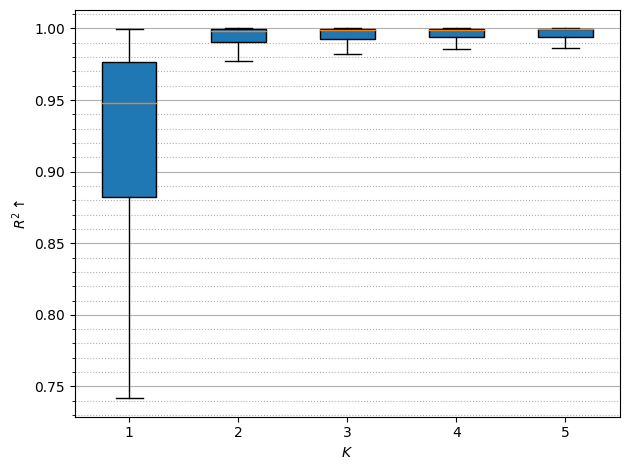

In [61]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("$K$")

ax1.set_ylabel(r"$R^2\uparrow$")
ax1.tick_params(axis="x", which="minor", bottom=False)

ax1.minorticks_on()

ax1.boxplot(list(R2_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

fig.tight_layout()

plt.xticks([1,2,3,4,5])

plt.grid(which='major', axis='y', linestyle='-')
plt.grid(which='minor', axis='y', linestyle=':')

plt.savefig('./K_Exp_R2.png', dpi=300)
plt.savefig('./K_Exp_R2.pdf')

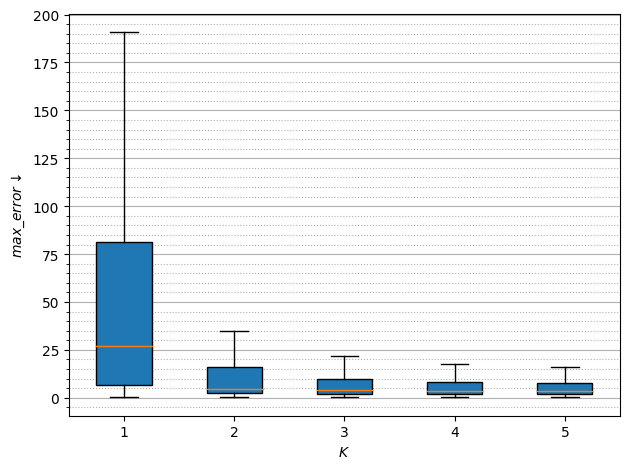

In [62]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("$K$")

ax1.set_ylabel(r"$max\_error\downarrow$")
ax1.tick_params(axis="x", which="minor", bottom=False)

ax1.minorticks_on()

ax1.boxplot(list(maxerror_results), patch_artist=True, showfliers=False)
# ax2.violinplot(
#     list(maxerror_results),
# )

fig.tight_layout()

plt.xticks([1, 2, 3, 4, 5])

plt.grid(which="major", axis="y", linestyle="-")
plt.grid(which="minor", axis="y", linestyle=":")

plt.savefig("./K_Exp.png", dpi=300)
plt.savefig("./K_Exp.pdf")